In [1]:
import os
import pandas as pd
from dotenv import load_dotenv
from transformers import BertTokenizer

/Users/oliverharcourt/code/projects/anime_recommendation_system/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
load_dotenv()
data_dir = os.getenv("DATA_DIR")

In [3]:
raw_data_path = os.path.join(data_dir, "raw", "anime_data.csv")
raw_data = pd.read_csv(raw_data_path)

In [4]:
def safe_length(synopsis):
    if pd.isna(synopsis):
        return 0  # Return 0 for NaN values
    return len(synopsis)

raw_data['synopsis_length'] = raw_data['synopsis'].apply(safe_length)

# Find the row with the maximum synopsis length
longest_synopsis = raw_data.loc[raw_data['synopsis_length'].idxmax()]

# Display the longest synopsis
print("Anime with the longest synopsis: ", longest_synopsis['title'])
print("The longest synopsis is:\n", longest_synopsis['synopsis'])
print("\nLength of the longest synopsis:", longest_synopsis['synopsis_length'])


Anime with the longest synopsis:  Tennis no Oujisama: Pair Prince
The longest synopsis is:
 Tezuka × Atobe ÷ Koharu Fudomine Middle School's tennis captain, Kippei Tachibana, asks rival school captains Kunimitsu Tezuka, Keigo Atobe, and Kuranosuke Shiraishi to assist him with his team's practice. Shiraishi's teammate, Koharu Konjiki, decides to tag along in hopes of being able to see his crush. Instead, Konjiki ends up becoming infatuated with both Tezuka and Atobe and struggles to pick between the two.  Fuji Kyoudai no Houkago (Fuji Brothers After School) Seishun's Shuusuke Fuji asks his younger brother Yuuta to go shopping with him to pick out a present for their older sister's birthday. As they proceed with their plans, Yuuta's teammates from the St. Rudolph Academy tennis team catch a glimpse of the two brothers and initially think nothing of it. However, St. Rudolph's manager, Hajime Mizuki, misinterprets the situation and believes Shuusuke is trying to get Yuuta to transfer back 

<Axes: xlabel='synopsis_length', ylabel='Count'>

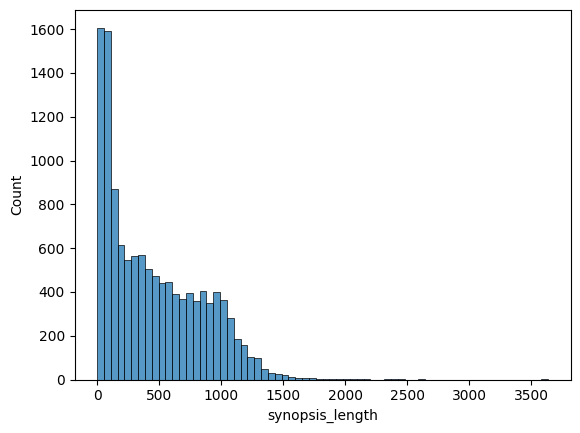

In [5]:
import seaborn as sns

sns.histplot(raw_data['synopsis_length'])


In [6]:
test = raw_data['synopsis'][0]
test = test * 3
test

'During their decade-long quest to defeat the Demon King, the members of the hero\'s party—Himmel himself, the priest Heiter, the dwarf warrior Eisen, and the elven mage Frieren—forge bonds through adventures and battles, creating unforgettable precious memories for most of them.  However, the time that Frieren spends with her comrades is equivalent to merely a fraction of her life, which has lasted over a thousand years. When the party disbands after their victory, Frieren casually returns to her "usual" routine of collecting spells across the continent. Due to her different sense of time, she seemingly holds no strong feelings toward the experiences she went through.  As the years pass, Frieren gradually realizes how her days in the hero\'s party truly impacted her. Witnessing the deaths of two of her former companions, Frieren begins to regret having taken their presence for granted; she vows to better understand humans and create real personal connections. Although the story of tha

In [7]:
tokenizer = BertTokenizer.from_pretrained('google-bert/bert-base-uncased')

In [17]:
raw_data['tokenized_synopsis'] = raw_data['synopsis'].apply(lambda x: tokenizer(x, truncation=True, max_length=512, return_tensors='pt') if not pd.isna(x) else None)

In [21]:
raw_data['tokenized_synopsis_length'] = raw_data['tokenized_synopsis'].apply(lambda x: x['input_ids'].shape[1] if not pd.isna(x) else 0)

Check how many 

8


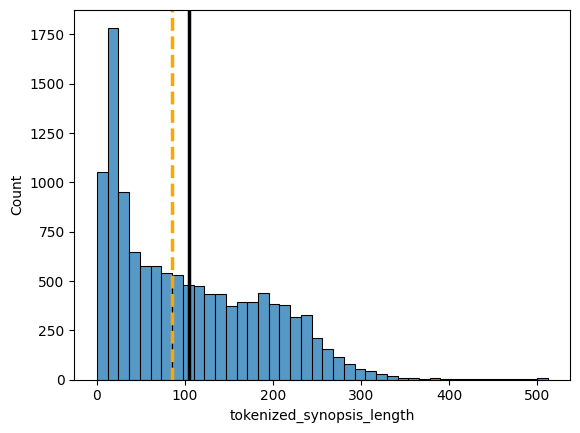

In [30]:
import matplotlib.pyplot as plt
sns.histplot(raw_data['tokenized_synopsis_length'])
plt.axvline(raw_data['tokenized_synopsis_length'].mean(), c='k', ls='-', lw=2.5)
plt.axvline(raw_data['tokenized_synopsis_length'].median(), c='orange', ls='--', lw=2.5)
raw_data['tokenized_synopsis_length'].describe()
#print(raw_data[raw_data['tokenized_synopsis_length'] == 512]['id'].count())

In [30]:
encoding = tokenizer.encode(test, max_length=512, truncation=True, padding='max_length', add_special_tokens=True)
print(encoding)
print(tokenizer.convert_ids_to_tokens(encoding))
print(len(encoding))

[101, 2076, 2037, 5476, 1011, 2146, 8795, 2000, 4154, 1996, 5698, 2332, 1010, 1996, 2372, 1997, 1996, 5394, 1005, 1055, 2283, 1517, 2032, 10199, 2370, 1010, 1996, 5011, 2002, 21646, 1010, 1996, 11229, 6750, 1041, 28992, 1010, 1998, 1996, 3449, 8159, 17454, 10424, 21253, 2078, 1517, 15681, 9547, 2083, 7357, 1998, 7465, 1010, 4526, 4895, 29278, 18150, 10880, 9062, 5758, 2005, 2087, 1997, 2068, 1012, 2174, 1010, 1996, 2051, 2008, 10424, 21253, 2078, 15970, 2007, 2014, 19033, 2003, 5662, 2000, 6414, 1037, 12884, 1997, 2014, 2166, 1010, 2029, 2038, 6354, 2058, 1037, 4595, 2086, 1012, 2043, 1996, 2283, 4487, 19022, 29560, 2044, 2037, 3377, 1010, 10424, 21253, 2078, 13217, 5651, 2000, 2014, 1000, 5156, 1000, 9410, 1997, 9334, 11750, 2408, 1996, 9983, 1012, 2349, 2000, 2014, 2367, 3168, 1997, 2051, 1010, 2016, 9428, 4324, 2053, 2844, 5346, 2646, 1996, 6322, 2016, 2253, 2083, 1012, 2004, 1996, 2086, 3413, 1010, 10424, 21253, 2078, 6360, 10919, 2129, 2014, 2420, 1999, 1996, 5394, 1005, 1055, 228